In [1]:
#マウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#ライブラリ

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pandas import DataFrame, Series
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings

In [2]:
train = pd.read_csv("C:/Users/c0b2217150/Documents/ml/signate/train.csv")
test = pd.read_csv("C:/Users/c0b2217150/Documents/ml/signate/test.csv")

In [3]:
train['Age']

0        50歳
1        56歳
2        NaN
3       三十七歳
4        48歳
        ... 
3484     40歳
3485     40代
3486     31歳
3487     56歳
3488     42歳
Name: Age, Length: 3489, dtype: object

In [13]:
import pandas as pd

#Ageマイ処理

# CSVファイルを読み込む
df = pd.DataFrame(train)
# 必要な関数を定義（省略していた場合は以下のコードを補完）

# 年齢を数値化する関数
def kanji_to_number(kanji_str):
    kanji_to_int = {
        '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
        '六': 6, '七': 7, '八': 8, '九': 9, '十': 10,
        '百': 100, '千': 1000, '万': 10000
    }
    if kanji_str.isdigit():
        return int(kanji_str)

    num = 0
    temp = 0
    for char in kanji_str:
        if char in kanji_to_int:
            scale = kanji_to_int[char]
            if scale >= 10:
                if temp == 0:
                    temp = 1
                num += temp * scale
                temp = 0
            else:
                temp = scale
    num += temp
    return num

def convert_age(age):
    if pd.isnull(age):
        return None
    age_str = str(age).replace('歳', '') .replace('代', '')

    if age_str.isdigit():
        return int(age_str)
    else:
        return kanji_to_number(age_str)

# 「Age」列を数値に変換
df['Age'] = df['Age'].apply(convert_age)

# 平均値で欠損値を補完
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age).astype(int)  # intに変換

# 結果の表示
df.head()


,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info,ProdTaken
0,0,50,Self Enquiry,2,900秒,Large Business,male,1.0,4.0,Basic,3.0,5,1,4,Executive,253905.0,未婚 車未所持 子供なし,1
1,1,56,Company Invited,1,14分,Salaried,Male,1.0,4.0,Standard,3.0,2,1,4,Senior Manager,404475.0,"離婚済み,車あり,子供無し",0
2,2,34,Self Enquiry,1,10分,Large Business,Female,1.0,3.0,Basic,3.0,4,0,4,Executive,278145.0,"結婚済み、自動車未所有,子供なし",1
3,3,37,Self Enquiry,2,1080秒,Small Business,female,1.0,3.0,Standard,4.0,1,0,5,Senior Manager,326805.0,離婚済み、車所持、子供無し,0
4,4,48,Company Invited,3,1020秒,Small Business,female,1.0,3.0,Basic,4.0,4,0,4,Executive,258435.0,独身／車所持／無子,1


In [15]:
#DurationOfPitch

import pandas as pd

# サンプルデータの作成（実際にはtrain.csvを読み込む）

# 秒数に変換する関数
def convert_to_seconds(duration):
    if pd.isnull(duration):  # 欠損値（NaN）のチェック
        return None
    if '秒' in duration:
        # "秒"の部分を取り除いて数値に変換
        return int(duration.replace('秒', ''))
    elif '分' in duration:
        # "分"の部分を取り除いて数値に変換し、60を掛けて秒に変換
        return int(duration.replace('分', '')) * 60
    else:
        # 予期しない形式の場合はNoneを返す（エラーハンドリング）
        return None

# DurationOfPitch列を秒数のint型に変換
df['DurationOfPitch'] = df['DurationOfPitch'].apply(convert_to_seconds)

# 平均値で欠損値を補完
mean_duration = df['DurationOfPitch'].mean()
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(mean_duration).astype(int)  # int型に変換

# 結果の表示
df.head()



TypeError: argument of type 'int' is not iterable

In [11]:
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)

# TypeofContact列の値を置き換え (Self Enquiryを1、Company Invitedを0)
df['TypeofContact'] = df['TypeofContact'].replace({'Self Enquiry': 1, 'Company Invited': 0})

# 結果を表示
df.head()

C:\Users\c0b2217150\AppData\Local\Temp\ipykernel_4512\2029458043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)


,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info,ProdTaken
0,0,50,1,2,900秒,NaN,1,1.0,4,Basic,3.0,5,1,4,Executive,253905.0,未婚 車未所持 子供なし,1
1,1,56,0,1,14分,NaN,1,1.0,4,Standard,3.0,2,1,4,Senior Manager,404475.0,"離婚済み,車あり,子供無し",0
2,2,34,1,1,10分,NaN,0,1.0,3,Basic,3.0,4,0,4,Executive,278145.0,"結婚済み、自動車未所有,子供なし",1
3,3,37,1,2,1080秒,NaN,0,1.0,3,Standard,4.0,1,0,5,Senior Manager,326805.0,離婚済み、車所持、子供無し,0
4,4,48,0,3,1020秒,NaN,0,1.0,3,Basic,4.0,4,0,4,Executive,258435.0,独身／車所持／無子,1


In [10]:
#occupatain ラベルエンコーディング



occupation_mapping = {
    'Large Business': 2,
    'Small Business': 1,
    'Salaried': 0
}

# Occupation列にマッピングを適用
df['Occupation'] = df['Occupation'].map(occupation_mapping)

df.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info,ProdTaken
0,0,50,1,2,900秒,NaN,1,1.0,4,Basic,3.0,5,1,4,Executive,253905.0,未婚 車未所持 子供なし,1
1,1,56,0,1,14分,NaN,1,1.0,4,Standard,3.0,2,1,4,Senior Manager,404475.0,"離婚済み,車あり,子供無し",0
2,2,34,1,1,10分,NaN,0,1.0,3,Basic,3.0,4,0,4,Executive,278145.0,"結婚済み、自動車未所有,子供なし",1
3,3,37,1,2,1080秒,NaN,0,1.0,3,Standard,4.0,1,0,5,Senior Manager,326805.0,離婚済み、車所持、子供無し,0
4,4,48,0,3,1020秒,NaN,0,1.0,3,Basic,4.0,4,0,4,Executive,258435.0,独身／車所持／無子,1


In [7]:
#gender 2値分類　最頻値補完

gender_mapping = {
    'male': 1, 'Male': 1,
    'female': 0, 'Female': 0
}

# Gender列にマッピングを適用
df['Gender'] = df['Gender'].map(gender_mapping)

# 欠損値を最頻値で補完
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# int型に変換
df['Gender'] = df['Gender'].astype(int)

C:\Users\c0b2217150\AppData\Local\Temp\ipykernel_4512\3183142433.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [8]:
#NumberOfFollowups intに変換
#外れ値と欠損値は最頻値で補完

most_frequent_value = df['NumberOfFollowups'].mode()[0]

# 99以上の外れ値を最頻値で補完
df['NumberOfFollowups'] = df['NumberOfFollowups'].apply(lambda x: most_frequent_value if x >= 99 else x)

# 欠損値を最頻値で補完
df['NumberOfFollowups'].fillna(most_frequent_value, inplace=True)

# float型からint型に変換
df['NumberOfFollowups'] = df['NumberOfFollowups'].astype(int)

C:\Users\c0b2217150\AppData\Local\Temp\ipykernel_4512\1843684062.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumberOfFollowups'].fillna(most_frequent_value, inplace=True)


In [152]:
def standardize_product_name(name):
    # 小文字に変換して不要な空白を除去
    name = name.lower().strip()

    ame = name.replace('|', 'l')


    # "basic" に一致するさまざまなパターン
    if re.search(r'\b(b|B|Β)(a|A|)(S|s)(I|i|ı)(c|C|𝘤)\b', name):
        return 'Basic'

    # "standard" に一致するさまざまなパターン
    elif re.search(r'\b(s|S)(t|T)(a|A)(n|N)(d|D)(a|A)(r|R)(d|D)\b', name):
        return 'Standard'

    # "deluxe" に一致するさまざまなパターン
    elif re.search(r'\b(d|D)(e|E)(l|L)(u|U)(x|X)\b', name):
        return 'Deluxe'

    # "super deluxe" に一致するさまざまなパターン
    elif re.search(r'\b(s|S)(u|U)(p|P)(e|E)(r|R)\s*b(d|D)(e|E)(l|L)(u|U)(x|X)\b', name):
        return 'Super deluxe'

    # "king" に一致するさまざまなパターン
    elif re.search(r'\b(k|K)(i|I)(n|N)(g|G)\b', name):
        return 'King'

    # その他の値はそのまま返す
    return name.capitalize()

df['ProductPitched'] = df['ProductPitched'].apply(standardize_product_name)

product_frequency_list_after_standardization = df['ProductPitched'].value_counts().to_dict()

# 結果を表示
print(product_frequency_list_after_standardization)


{'Basic': 1118, 'Deluxe': 1022, 'Standard': 814, 'Super deluxe': 300, 'King': 123, 'De|uxe': 13, 'Βasic': 9, 'Super de|uxe': 5, 'Вasic': 4, 'Basiс': 4, 'Super ᗞeluxe': 4, '𐊡asic': 4, 'Basiϲ': 4, 'Staոdard': 4, 'S𝘵andard': 3, 'Standa𝘳d': 3, 'Տtandard': 3, 'ᗞeluxe': 3, 'Stand𝖺rd': 3, '𝙳eluxe': 2, 'ꓢtandard': 2, 'Standar𝔡': 2, 'Ꭰeluxe': 2, 'ꓢuper deluxe': 2, 'Ѕtandard': 2, 'B𝖺sic': 2, 'Super ꭰeluxe': 2, 'St𝖺ndard': 2, 'Ѕuper deluxe': 2, 'Տuper deluxe': 1, '𐊡asi𝘤': 1, 'Kıոg': 1, 'Kiոg': 1, 'Βasıc': 1, 'Super dεluxe': 1, 'B𝖺si𝘤': 1, 'Βasiс': 1, 'Super 𝙳eluxe': 1, 'Տtanda𝘳d': 1, 'Deluxε': 1, 'Basιc': 1, 'Stanᗞard': 1, 'В𝖺sic': 1, 'Dεluxε': 1, 'ꓢuper de|uxe': 1, 'Standarꭰ': 1, 'Ｓuper deluxe': 1, 'Baտic': 1, 'Bαsic': 1, 'Baｓic': 1, 'Kıng': 1, 'Βası𝘤': 1, 'De|u×e': 1, 'Baꓢic': 1, 'Basıϲ': 1}


In [154]:
import pandas as pd
from unidecode import unidecode
import re

# データの準備
data = {
    'ProductPitched': [
        'Basic', 'Deluxe', 'Standard', 'Super deluxe', 'King', 'De|uxe', 'Βasic', 'Super de|uxe',
        'Вasic', 'Basiс', 'Super ᗞeluxe', '𐊡asic', 'Basiϲ', 'Staոdard', 'S𝘵andard', 'Standa𝘳d',
        'Տtandard', 'ᗞeluxe', 'Stand𝖺rd', '𝙳eluxe', 'ꓢtandard', 'Standar𝔡', 'Ꭰeluxe',
        'ꓢuper deluxe', 'Ѕtandard', 'B𝖺sic', 'Super ꭰeluxe', 'St𝖺ndard', 'Ѕuper deluxe',
        'Տuper deluxe', '𐊡asi𝘤', 'Kıոg', 'Kiոg', 'Βasıc', 'Super dεluxe', 'B𝖺si𝘤',
        'Βasiс', 'Super 𝙳eluxe', 'Տtanda𝘳d', 'Deluxε', 'Basιc', 'Stanᗞard', 'В𝖺sic',
        'Dεluxε', 'ꓢuper de|uxe', 'Standarꭰ', 'Ｓuper deluxe', 'Baտic', 'Bαsic', 'Baｓic',
        'Kıng', 'Βası𝘤', 'De|u×e', 'Baꓢic', 'Basıϲ'
    ]
}

df = pd.DataFrame(data)

# 標準化関数の定義
def standardize_product_name(name):
    # Unicode文字をASCIIに変換
    name = unidecode(name)

    # 小文字に変換して不要な空白を除去
    name = name.lower().strip()

    # '|' を 'l' に置換
    name = name.replace('|', 'l')

    # 非英数字文字をスペースに置換
    name = re.sub(r'[^a-z ]', ' ', name)

    # 複数のスペースを単一のスペースに置換し、前後のスペースを削除
    name = re.sub(r'\s+', ' ', name).strip()

    # マッピングロジック
    # 'super deluxe' を最初にチェック
    if re.search(r'\bsuper deluxe\b', name, re.IGNORECASE):
        return 'Super deluxe'
    # 'basic' をチェック
    elif re.search(r'\bbasic\b', name, re.IGNORECASE):
        return 'Basic'
    # 'standard' をチェック
    elif re.search(r'\bstandard\b', name, re.IGNORECASE):
        return 'Standard'
    # 'deluxe' をチェック
    elif re.search(r'\bdeluxe\b', name, re.IGNORECASE):
        return 'Deluxe'
    # 'king' をチェック
    elif re.search(r'\bking\b', name, re.IGNORECASE):
        return 'King'
    else:
        return 'Unknown'  # マッピングされない場合

# 関数の適用
df['ProductPitched'] = df['ProductPitched'].apply(standardize_product_name)

# 結果の集計
product_frequency_list_after_standardization = df['ProductPitched'].value_counts().to_dict()

# 結果を表示
print(product_frequency_list_after_standardization)


ModuleNotFoundError: No module named 'unidecode'

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120356 (\N{MATHEMATICAL SANS-SERIF ITALIC SMALL C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 66209 (\N{CARIAN LETTER P2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120371 (\N{MATHEMATICAL SANS-SERIF ITALIC SMALL R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120373 (\N{MATHEMATICAL SANS-SERIF ITALIC SMALL T}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120097 (\N{MATHEMATICAL FRAKTUR SMALL D}) missing from current font.
  fig.canvas.pr

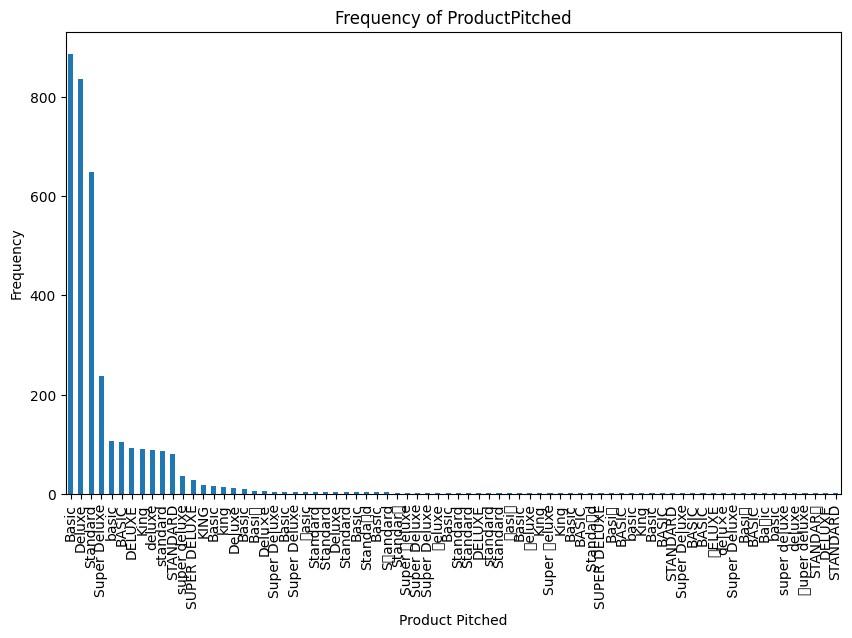

In [140]:
product_frequency = df['ProductPitched'].value_counts()

# 棒グラフの描画
plt.figure(figsize=(10, 6))
product_frequency.plot(kind='bar')
plt.title('Frequency of ProductPitched')
plt.xlabel('Product Pitched')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)  # x軸のラベルを45度傾けて表示
plt.show()

In [80]:
TypeofContact = df["TypeofContact"]
TypeofContact.dtype

dtype('int64')

In [9]:
df.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info,ProdTaken
0,0,50,1,2,900秒,2,1,1.0,4,Basic,3.0,5,1,4,Executive,253905.0,未婚 車未所持 子供なし,1
1,1,56,0,1,14分,0,1,1.0,4,Standard,3.0,2,1,4,Senior Manager,404475.0,"離婚済み,車あり,子供無し",0
2,2,34,1,1,10分,2,0,1.0,3,Basic,3.0,4,0,4,Executive,278145.0,"結婚済み、自動車未所有,子供なし",1
3,3,37,1,2,1080秒,1,0,1.0,3,Standard,4.0,1,0,5,Senior Manager,326805.0,離婚済み、車所持、子供無し,0
4,4,48,0,3,1020秒,1,0,1.0,3,Basic,4.0,4,0,4,Executive,258435.0,独身／車所持／無子,1


In [105]:
df.isnull().sum()

,0
id,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0
ProductPitched,0
